 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [256]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from datetime import datetime

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [257]:
# Reading whale returns
whale_path = Path("../Whale off the Port(folio)/Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path)
whale_df = whale_df.set_index('Date')
whale_df.index=pd.to_datetime(whale_df.index)
whale_df.index=whale_df.index.strftime('%m/%d/%y')
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
03/02/15,NaN,NaN,NaN,NaN
03/03/15,-0.001266,-0.004981,-0.000496,-0.006569
03/04/15,0.002230,0.003241,-0.002534,0.004213
03/05/15,0.004016,0.004076,0.002355,0.006726
03/06/15,-0.007905,-0.003574,-0.008481,-0.013098


In [223]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [224]:
# Drop nulls
whale_df=whale_df.dropna()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
03/03/15,-0.001266,-0.004981,-0.000496,-0.006569
03/04/15,0.002230,0.003241,-0.002534,0.004213
03/05/15,0.004016,0.004076,0.002355,0.006726
03/06/15,-0.007905,-0.003574,-0.008481,-0.013098
03/09/15,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [225]:
# Reading algorithmic returns
algo_path = Path("../Whale off the Port(folio)/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path)
algo_df = algo_df.set_index('Date')
algo_df.index=pd.to_datetime(algo_df.index)
algo_df.index=algo_df.index.strftime('%m/%d/%y')
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [226]:
# Count nulls
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [227]:
# Drop nulls
algo_df=algo_df.dropna()
algo_df.head()

,Algo 1,Algo 2
Date,,
06/05/14,0.004062,0.013285
06/06/14,0.001857,0.008284
06/09/14,-0.005012,0.005668
06/10/14,0.004406,-0.000735
06/11/14,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [228]:
# Reading S&P 500 Closing Prices
sp500_path = Path("../Whale off the Port(folio)/Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path)
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [229]:
# Check Data Types
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [230]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

/var/folders/y3/j2chk1jd5yb0qdpr9zy3x8q00000gp/T/ipykernel_54079/732684710.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")


Date      object
Close    float64
dtype: object

In [231]:
# Drop nulls
daily_returns.index=pd.to_datetime(daily_returns.index)
daily_returns.index=daily_returns.index.strftime('%m/%d/%y')
daily_returns = daily_returns.copy()
daily_returns.dropna(inplace=True)
daily_returns.isnull().sum()

SP 500 Close    0
dtype: int64

In [232]:
# Calculate Daily Returns
sp500_df.set_index(pd.to_datetime(sp500_df["Date"], infer_datetime_format=True), inplace=True)
sp500_df.drop(columns=["Date"], inplace=True)
daily_returns = sp500_df.pct_change()
daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [233]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns = daily_returns.rename(columns={"Close": "SP 500 Close"})
daily_returns

,SP 500 Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [234]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, daily_returns], axis="columns", join="outer")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500 Close
Date,,,,,,,
2012-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-0.000872
2012-10-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-0.003611
2012-10-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-0.007123
2012-10-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.000322
2012-10-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.003469
...,...,...,...,...,...,...,...
12/30/15,-0.009674,-0.003496,-0.010775,-0.014945,0.002880,-0.010102,NaN
12/30/16,-0.001306,0.005322,-0.006238,-0.006362,-0.002822,-0.000829,NaN
12/31/14,NaN,NaN,NaN,NaN,0.008770,-0.004628,NaN


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

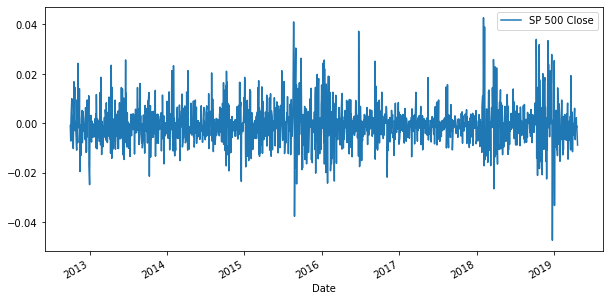

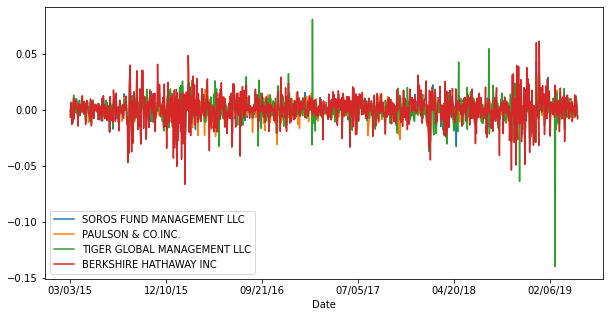

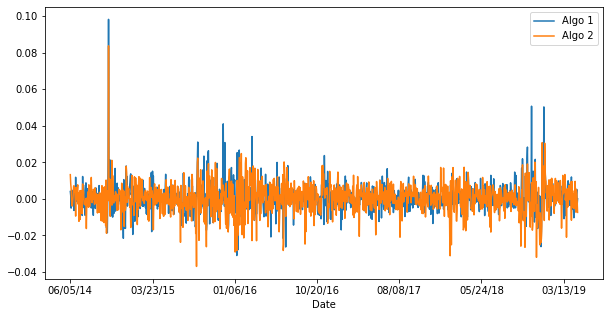

In [235]:
# Plot daily returns of all portfolios
daily_returns.plot(figsize=(10,5))
whale_df.plot(figsize=(10,5))
algo_df.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of Algo over the last 5 Years'}, xlabel='Date'>

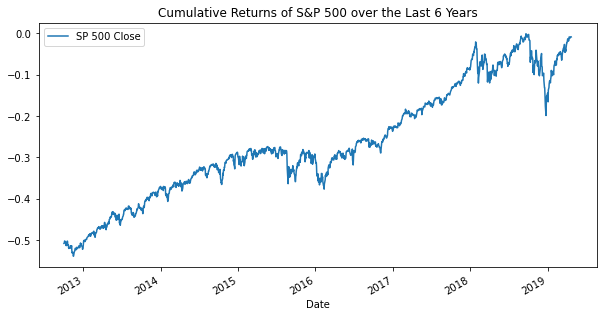

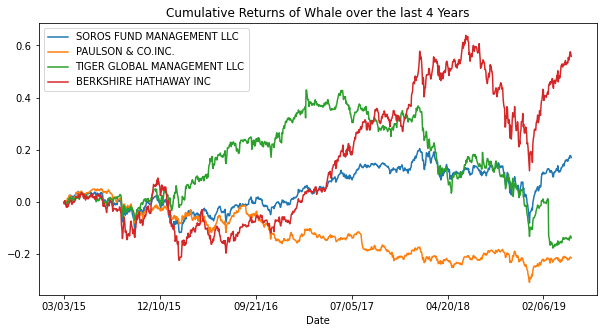

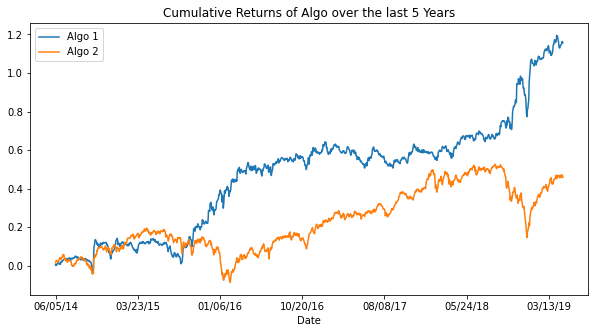

In [236]:
# Calculate cumulative returns of all portfolios
cumulative_returns_SP500 = (1 + daily_returns).cumprod() - 1
cumulative_returns_whale = (1 + whale_df).cumprod() - 1
cumulative_returns_algo = (1+algo_df).cumprod()-1
# Plot cumulative returns
cumulative_returns_SP500.plot(figsize=(10,5), title="Cumulative Returns of S&P 500 over the Last 6 Years")
cumulative_returns_whale.plot(figsize=(10,5), title="Cumulative Returns of Whale over the last 4 Years")
cumulative_returns_algo.plot(figsize=(10,5), title="Cumulative Returns of Algo over the last 5 Years")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

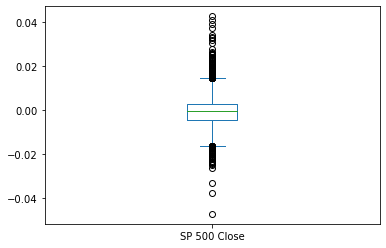

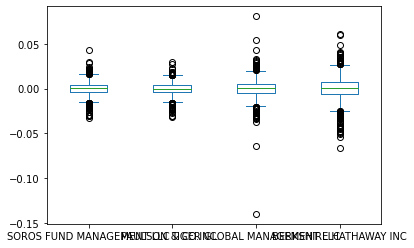

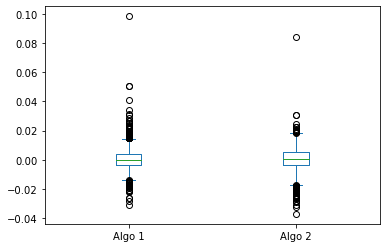

In [237]:
# Box plot to visually show risk
daily_returns.plot.box()
whale_df.plot.box()
algo_df.plot.box()

### Calculate Standard Deviations

In [246]:
# Calculate the daily standard deviations of all portfolios
daily_std_sp500 = daily_returns.std()
daily_std_whale = whale_df.std()
daily_std_algo = algo_df.std()

### Determine which portfolios are riskier than the S&P 500

In [247]:
# Calculate  the daily standard deviation of S&P 500
daily_std_sp500 = daily_returns.std()
# Determine which portfolios are riskier than the S&P 500
daily_std_sp500_std = np.random.normal(scale=0.5, size=10000)
daily_std_whale = np.random.normal(scale=1.0, size=10000)
daily_std_algo = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5": daily_std_sp500,
    "1.0": daily_std_whale,
    "1.5": daily_std_algo
})

portfolio_std.plot.hist(stacked=True, bins=100)

ValueError: array length 10000 does not match index length 1

### Calculate the Annualized Standard Deviation

In [248]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std_whale * np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

AttributeError: 'numpy.ndarray' object has no attribute 'rolling'

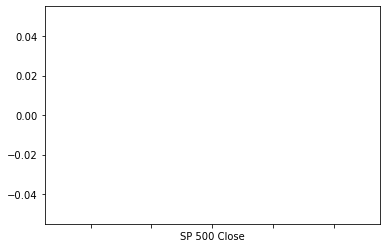

In [250]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
daily_std_sp500.rolling(window=21).mean().plot()
daily_std_algo.rolling(window=21).mean().plot()
daily_std_whale.rolling(window=21).mean().plot()

### Calculate and plot the correlation

In [ ]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [299]:
# Annualized Sharpe Ratios
all_portfolios_returns = pd.concat([algo_df, whale_df], axis='columns', join='inner')
sharpe_ratios = ((all_portfolios_returns.mean() * 252) / (all_portfolios_returns.std() * np.sqrt(252))

SyntaxError: unexpected EOF while parsing (518506944.py, line 3)

In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [285]:
# Reading data from 1st stock
aapl_path = Path("../Whale off the Port(folio)/Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [286]:
# Reading data from 2nd stock
goog_path = Path("../Whale off the Port(folio)/Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_path, index_col= "Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [287]:
# Reading data from 3rd stock
cost_path = Path("../Whale off the Port(folio)/Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [288]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([cost_df, goog_df, aapl_df], axis="columns", join="inner")
combined_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,COST,243.47,GOOG,1162.38,AAPL,200.72
2019-05-08,COST,241.34,GOOG,1166.27,AAPL,202.90
2019-05-07,COST,240.18,GOOG,1174.10,AAPL,202.86
2019-05-06,COST,244.23,GOOG,1189.39,AAPL,208.48
2019-05-03,COST,244.62,GOOG,1185.40,AAPL,211.75


In [289]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [290]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!